In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('z:\ML\playtennis.csv')

In [2]:
data

,outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [6]:
data['outlook']=Le.fit_transform(data['outlook'])
data['Temperature']=Le.fit_transform(data['Temperature'])
data['Humidity']=Le.fit_transform(data['Humidity'])
data['Wind']=Le.fit_transform(data['Wind'])
data['PlayTennis']=Le.fit_transform(data['PlayTennis'])
data

,outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


Matplotlib is building the font cache; this may take a moment.


[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

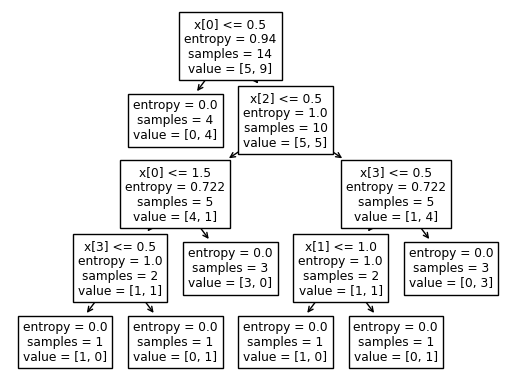

In [7]:
x=data.drop(['PlayTennis'],axis=1)
y=data['PlayTennis']
from sklearn import tree
import matplotlib
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x,y)
tree.plot_tree(clf)

# decision tree using iris dataset

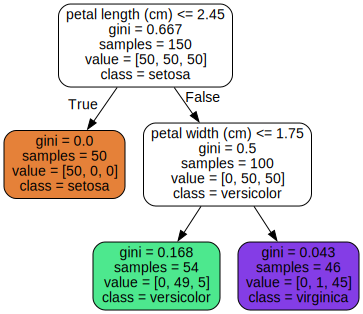

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data[:,2:] #petal length and width
Y=iris.target
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,Y)
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)
from graphviz import Source
Source.from_file('iris_tree.dot')

In [8]:
%pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


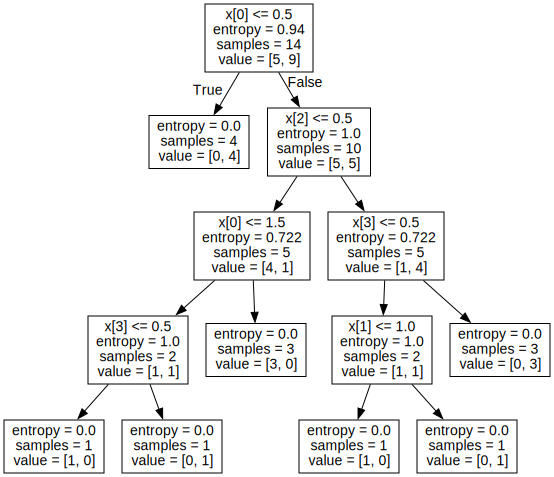

In [9]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_pred=clf.predict(x_test)
cf_matrix=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cf_matrix)
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)


Confusion Matrix: [[3 0]
 [0 2]]
Accuracy :  100.0


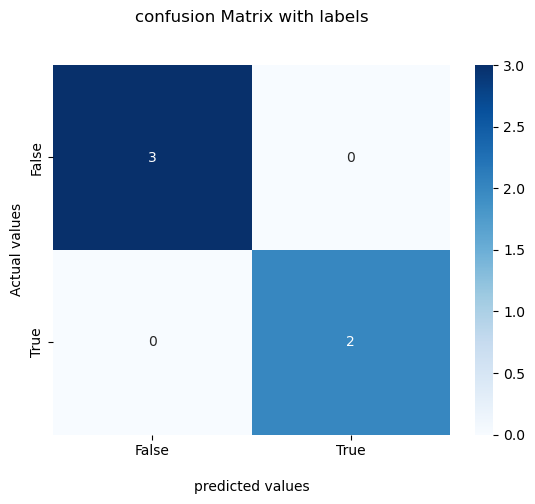

In [13]:
import seaborn as sns
ax=sns.heatmap(cf_matrix,annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()